$\dfrac{u_i^{n+1}-u_i^n}{\tau}+f'_u(u_i^n)\dfrac{u_i^n-u_{i-1}^n}{h}=0$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#явный метод
def expl(f_der, u0, bound1, bound2, a, b, tau, n, T, times, time=True):

    x = np.linspace(a, b, n)
    h = x[1]-x[0]
    t = 0
    u = u0(x)
    t = 1
    while t*tau<T:

        u_new = np.zeros(n)
        for j in range(1, n-1):
            f_deriv = f_der(u[j])
            if f_deriv<0:
                u_new[j] = u[j]-f_deriv*tau*(u[j+1]-u[j])/h
            else:
                u_new[j] = u[j]-f_deriv*tau*(u[j]-u[j-1])/h
        u_new[0]=bound1(tau*t)
        u_new[-1]=bound2(tau*t)
        if (t*tau in times and time) or (t in times and not time):
            plt.plot(x, u, color='red')
            plt.title('t = ' + str(t*tau))
            plt.show()
            plt.figure(figsize=(5,3))
        u = u_new.copy()
        t += 1

### Пример 1

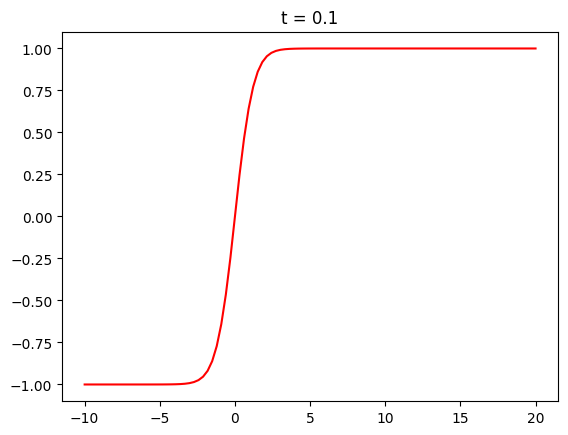

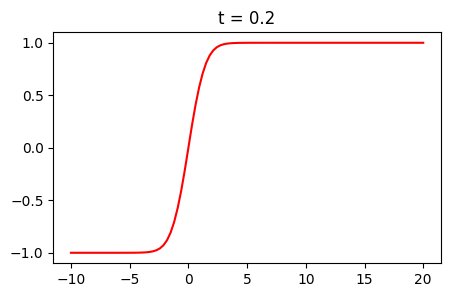

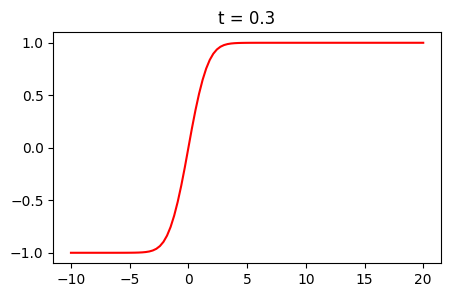

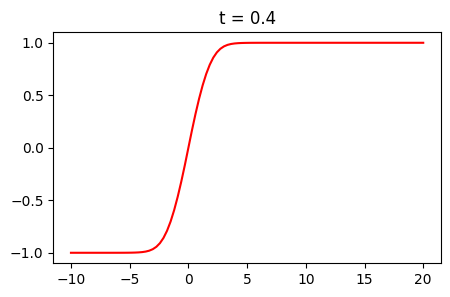

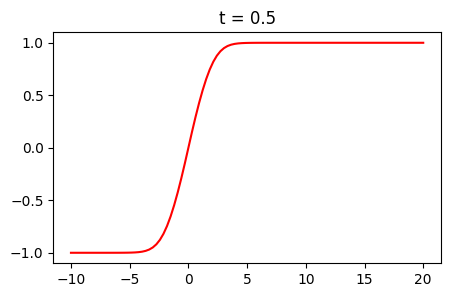

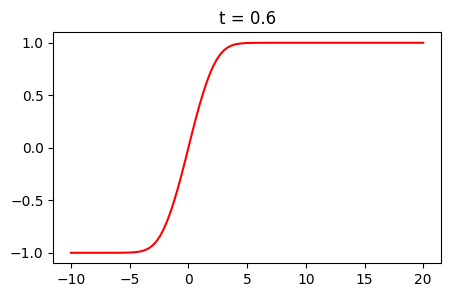

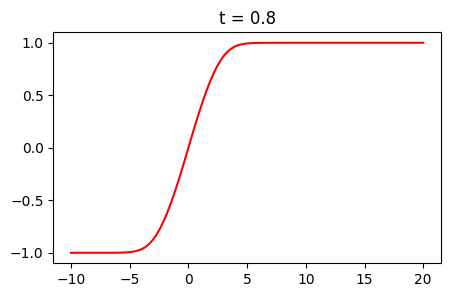

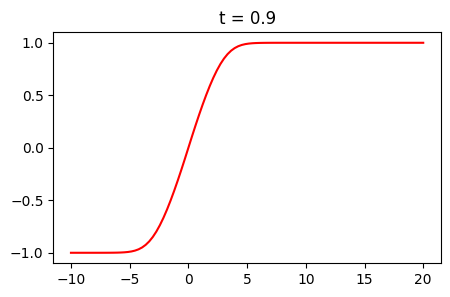

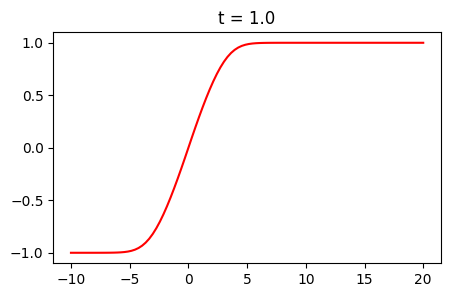

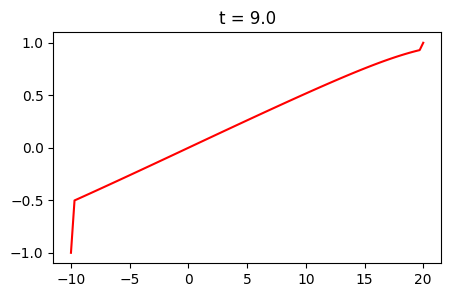

<Figure size 500x300 with 0 Axes>

In [13]:
tau = 0.001
f_der = lambda x:2*x
u0 = lambda x: np.tanh(x)
expl(f_der, u0, lambda x: -1, lambda x: 1, a=-10, b=20, tau=tau, n=100, T=10, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1,9], time=True)

### Пример 2

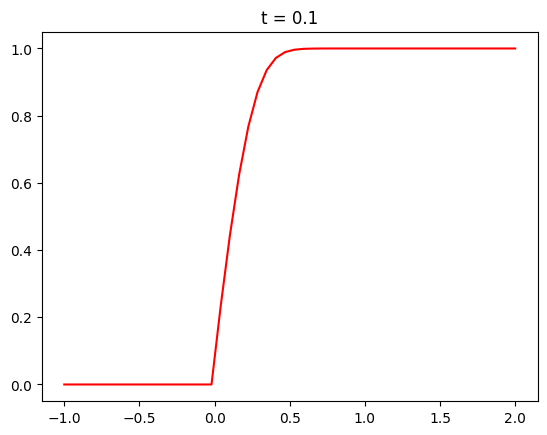

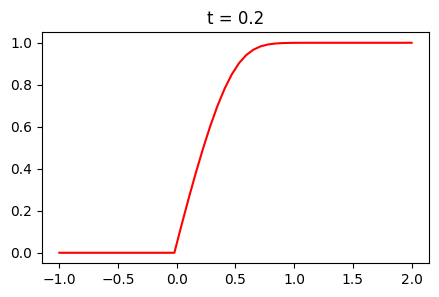

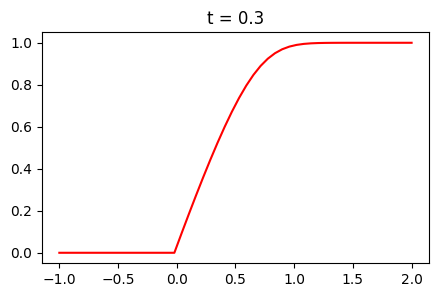

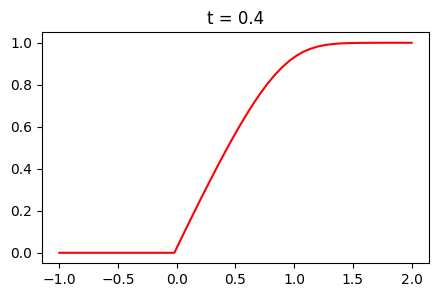

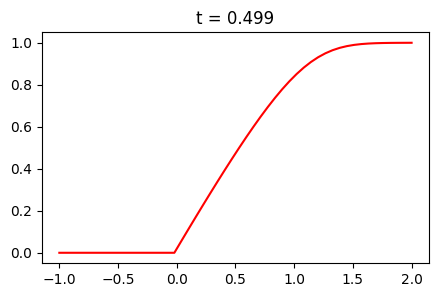

<Figure size 500x300 with 0 Axes>

In [14]:
tau = 0.001
H = np.vectorize(lambda x: float(x>0))
expl(f_der, H, lambda x: 0, lambda x: 1, a=-1, b=2, tau=tau, n=50, T=1/2, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5-tau], time=True)

### Пример 3

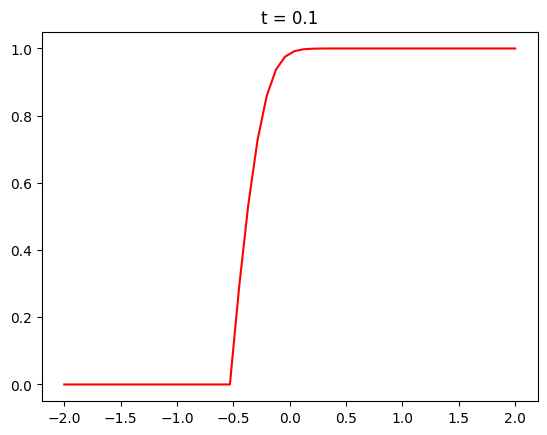

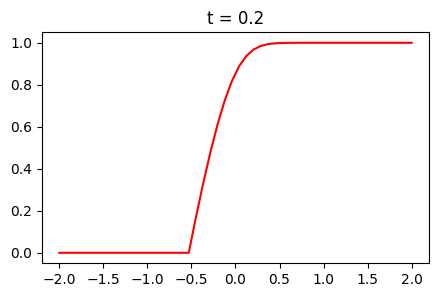

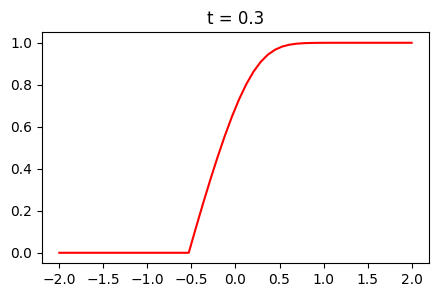

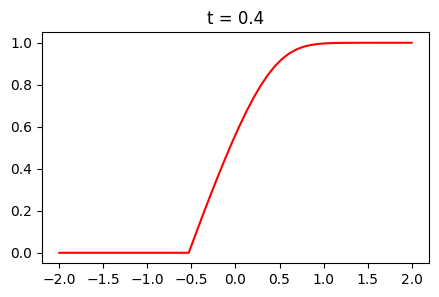

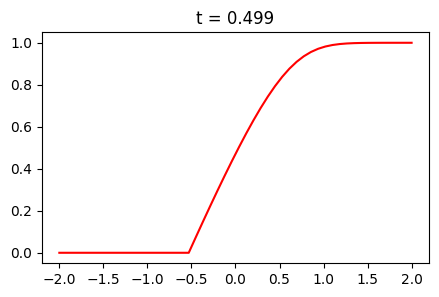

<Figure size 500x300 with 0 Axes>

In [15]:
tau = 0.001
f_der = lambda u: 2 * u
expl(f_der, lambda s :H(s+0.5), lambda x: 0, lambda x: 1, a=-2, b=2, tau=tau, n=50, T=1/2, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5-tau], time=True)

In [16]:
#неявный метод
def impl(f_der, u0, bound1, bound2, a, b, tau, n, T, times, time=True, pos=True):
    
    x = np.linspace(a, b, n)
    h = x[1]-x[0]
    u = u0(x)
    t = 1
    while t*tau<T:
        u_new = np.zeros(n)
        u_new[0] = bound1(tau*t)
        u_new[-1] = bound2(tau*t)
        for j in range(1, n-1):
            f_deriv = f_der(u[j])
            if f_deriv > 0:  
                u_new[j] = (h * u[j] + tau * f_deriv * u_new[j-1])/(h + tau * f_deriv)
        for j in range(n-2, 0, -1):
            f_deriv = f_der(u[j])
            if f_deriv < 0:
                u_new[j] = (h * u[j] - tau * f_deriv * u_new[j+1])/(h - tau * f_deriv)
        if (t*tau in times and time) or (t in times and not time):
            plt.plot(x, u,color='red')
            plt.title('t = ' + str(t*tau))
            plt.show()
            plt.figure(figsize=(5,3))
        u = u_new.copy()
        t += 1

### Пример 1

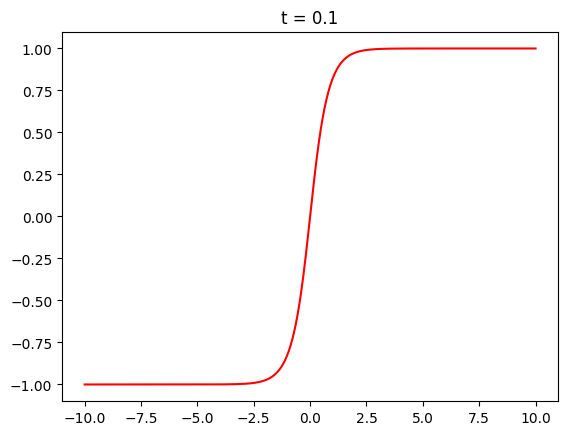

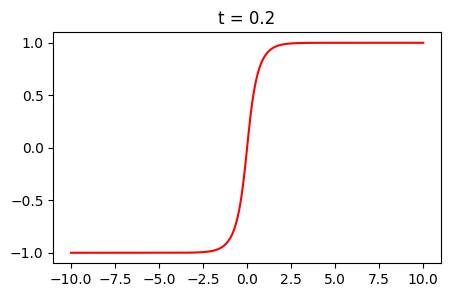

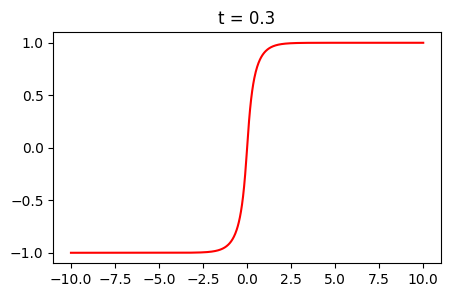

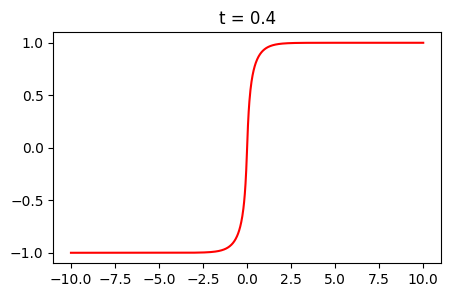

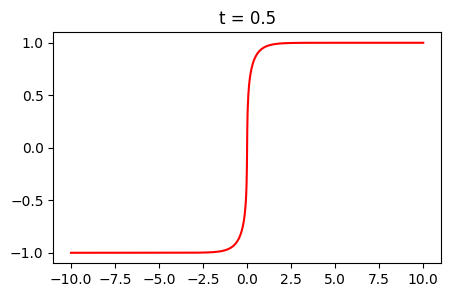

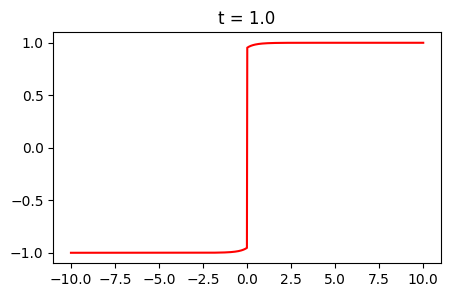

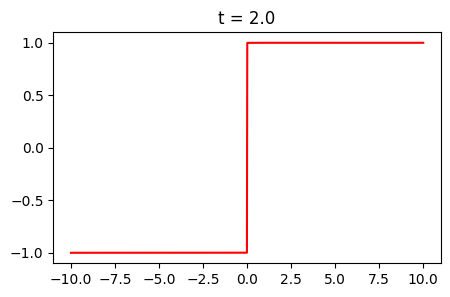

<Figure size 500x300 with 0 Axes>

In [26]:
tau = 0.001
impl(f_der = lambda x:  - 2 * x, u0 = lambda x: np.tanh(x), bound1 = lambda x:-1, bound2=lambda x:1, a=-10, b=10, tau=tau, n=1000, T=10, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2], time=True, pos=True)

In [28]:
tau = 0.001
impl(f_der = lambda x:  - 3 * x^2, u0 = lambda x: np.tanh(x), bound1 = lambda x:-1, bound2=lambda x:1, a=-10, b=10, tau=tau, n=1000, T=10, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3], time=True, pos=True)

TypeError: ignored

### Пример 2

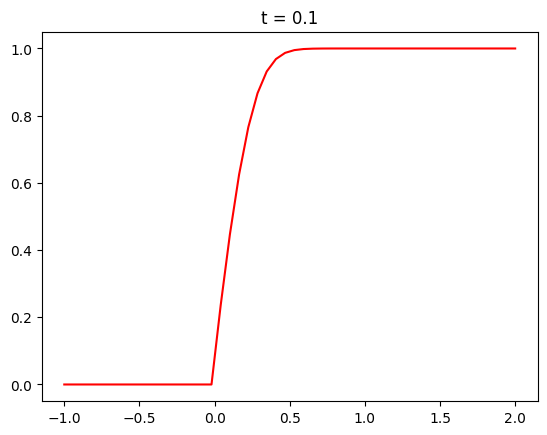

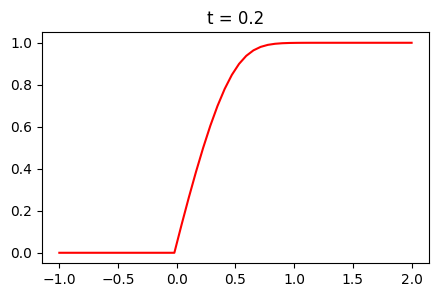

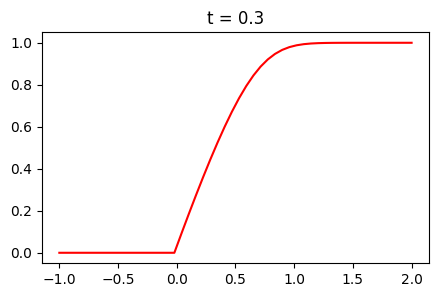

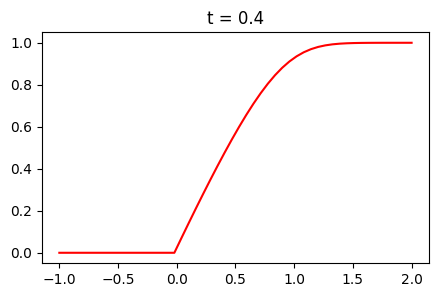

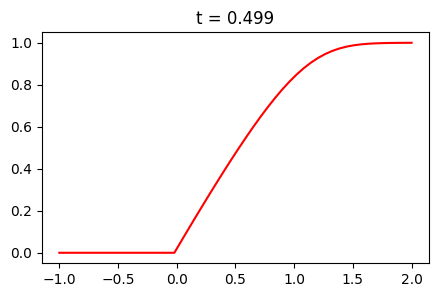

<Figure size 500x300 with 0 Axes>

In [24]:
H = np.vectorize(lambda x: float(x>0))
impl(f_der, H, lambda x: 0, lambda x: 1, a=-1, b=2, tau=tau, n=50, T=1/2, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5-tau], time=True, pos=True)

### Пример 3

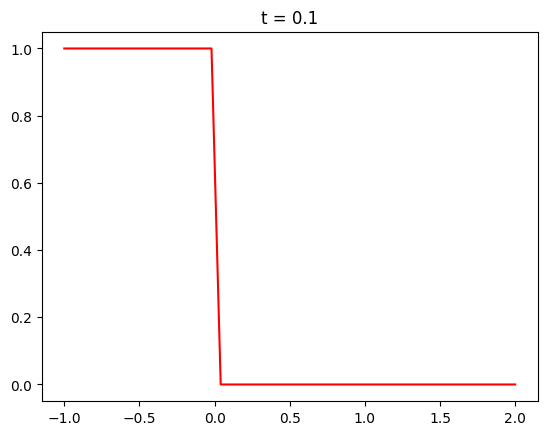

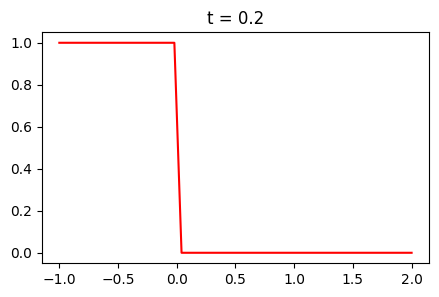

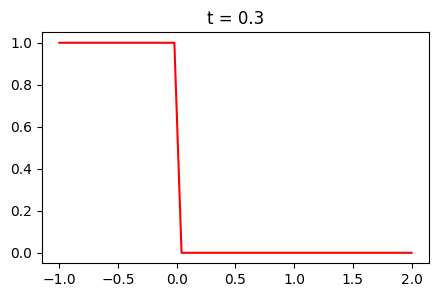

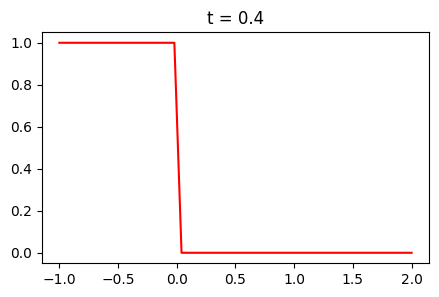

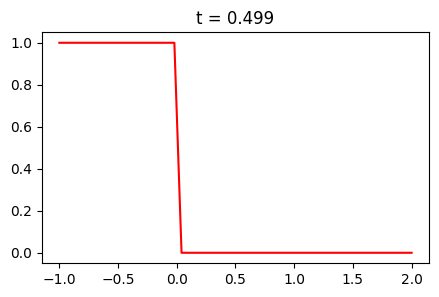

<Figure size 500x300 with 0 Axes>

In [25]:
H = np.vectorize(lambda x: float(x<0))
tau = 0.001
impl(f_der, H, lambda x: 1, lambda x: 0, a=-1, b=2, tau=tau, n=50, T=1/2, times=[0, 0.1, 0.2, 0.3, 0.4, 0.5-tau], time=True, pos=True)